In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline

In [4]:
subset = "validation"
image = "6269_501_21"
preds_folder = "../data/preds"

In [5]:
def load_data(subset, image, preds_folder=None):
    # Load base image, Lidar image, ground truth mask and optionally predicted mask
    base_image = cv2.imread(f"../data/{subset}/images/{image}.tif")
    lidar_image = cv2.imread(f"../data/{subset}/lidar/{image}.tif", cv2.IMREAD_UNCHANGED).repeat(3).reshape(500, 500, 3)
    lidar_image = ((lidar_image / np.max(lidar_image)) * 255).astype(np.uint8)
    gt_mask = cv2.cvtColor(cv2.imread(f"../data/{subset}/masks/{image}.tif", cv2.IMREAD_GRAYSCALE), cv2.COLOR_BGR2RGB) * 255
    gt_mask[..., 0] = 0
    gt_mask[..., 2] = 0

    if preds_folder is not None:
        pred_mask = cv2.imread(f"{preds_folder}/{image}_classified.jpg")
        pred_mask[..., 0] = 0
        pred_mask[..., 1] = 0
    else: pred_mask = None
    return base_image, lidar_image, gt_mask, pred_mask

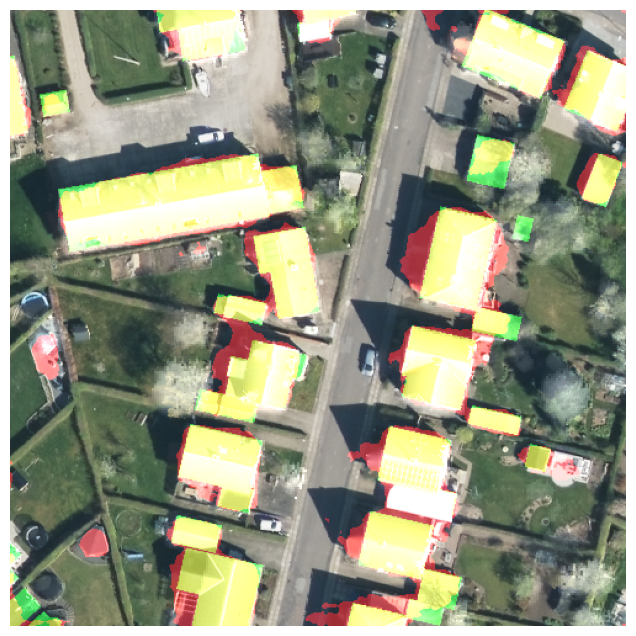

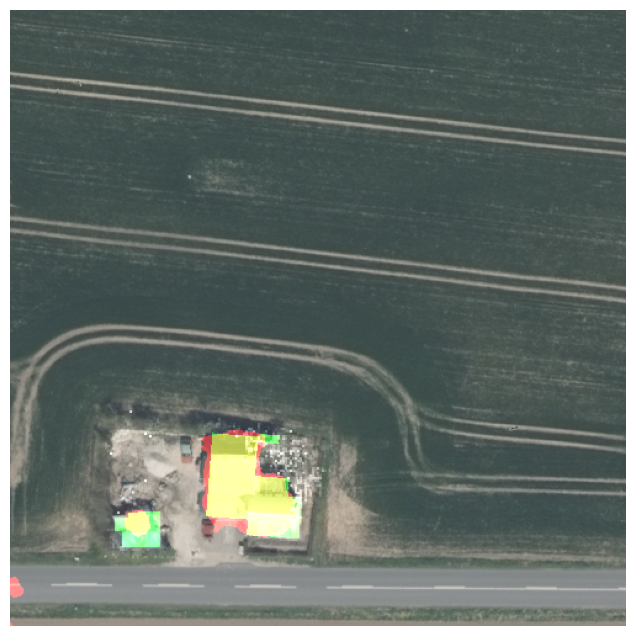

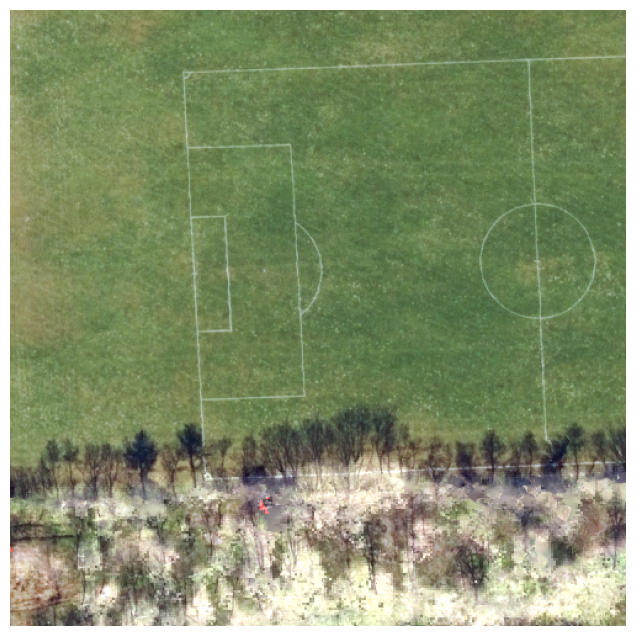

In [13]:
imgs = ["6269_501_21", "6305_470_41", "6369_560_38"]
for img in imgs:
    base_image, lidar_image, gt_mask, pred_mask = load_data(subset, img, preds_folder)
    fig, ax = plt.subplots(figsize=(8, 8))
    out = base_image.copy()
    # out = lidar_image.copy()
    out = cv2.addWeighted(out, 1., lidar_image, 0.5, 0)
    out = cv2.addWeighted(out, 1., gt_mask, 0.5, 0)
    if pred_mask is not None:
        out = cv2.addWeighted(out, 1., pred_mask, 0.5, 0)
    ax.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    ax.axis("off")
    plt.show()

In [8]:
lidar_image = cv2.imread(f"../data/{subset}/lidar/{image}.tif", cv2.IMREAD_UNCHANGED)

In [9]:
lidar_image

array([[1.0917978 , 0.38498402, 0.38498402, ..., 0.        , 0.        ,
        0.        ],
       [1.291894  , 2.1582527 , 2.1582527 , ..., 0.        , 0.        ,
        0.        ],
       [1.291894  , 2.1582527 , 2.1582527 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.9465027 , 2.762103  , 2.762103  , ..., 0.        , 0.        ,
        0.38627815],
       [2.9465027 , 2.762103  , 2.762103  , ..., 0.        , 0.        ,
        0.38627815],
       [2.7497616 , 2.5566854 , 2.5566854 , ..., 0.03691864, 0.03691864,
        0.06396103]], dtype=float32)

In [10]:
lidar_image.shape

(500, 500)

In [11]:
lidar_image.max()

11.5905905

In [12]:
lidar_image.mean()

1.7321267